# QF600 ASSETING PRICING
## HomeWork 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd         module    <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sm         module    <module 'statsmodels.api'<...>ages/statsmodels/api.py'>


### Capital Asset Pricing Model (CAPM)

## <span style="color:red">读取数据</span>

In [5]:
# 读取数据
industry_portfolios = \
    pd\
    .read_csv("/Users/lu/Desktop/Industry_Portfolios.csv")

mkt_portfolio =\
    pd\
    .read_csv("/Users/lu/Desktop/Market_Portfolio.csv")

industry_portfolios

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [6]:
mkt_portfolio

,Date,Market
0,200401,2.22
1,200402,1.46
2,200403,-1.23
3,200404,-1.75
4,200405,1.23
...,...,...
115,201308,-2.69
116,201309,3.76
117,201310,4.17
118,201311,3.12


## <span style="color:red">合并数据到一个数据集中</span>

In [7]:
# merge two data frames 合并成一个dataframe，包含各个行业和市场收益的表

merged_data =\
    pd\
    .merge(industry_portfolios, 
           mkt_portfolio, 
           on='Date', 
           how='inner')

merged_data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74,3.12


## <span style="color:red">定义risk-free rate并计算市场超额收益</span>

#### Assume that the (net) risk-free rate is 0.13% per month.

In [8]:
risk_free_rate = 0.13

#### USING FORMULA: $\tilde{R}_i - R_f = \alpha_i + \beta_i(\tilde{R}_m - R_f) $

In [11]:
#R_m - R_f (mkt excess return)
# 市场的超额收益 = 市场组合收益 - 无风险利率
# 超额收益是CAPM的核心变量，用于评估资产相对市场的表现
merged_data["mkt_excess_returns"] =\
    merged_data["Market"]\
    -\
    risk_free_rate

merged_data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,...,NoDur_Excess_Returns,Durbl_Excess_Returns,Manuf_Excess_Returns,Enrgy_Excess_Returns,HiTec_Excess_Returns,Telcm_Excess_Returns,Shops_Excess_Returns,Hlth_Excess_Returns,Utils_Excess_Returns,Other_Excess_Returns
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,...,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,...,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,...,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,...,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,...,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,...,-4.13,-1.13,-2.08,-1.96,-0.25,-3.41,-4.34,-3.62,-4.56,-3.79
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,...,1.81,6.33,5.07,1.90,3.64,4.20,4.33,4.06,0.92,3.70
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,...,4.62,0.59,4.43,4.73,3.67,5.39,4.95,3.34,3.22,3.74
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,...,1.16,1.68,2.82,0.72,3.52,0.14,3.54,4.41,-1.94,4.61


## <span style="color:red">计算各个行业的超额收益</span>

In [12]:
# R_i - R_f(for each industry excess return)：表示资产收益相对于无风险收益的超额部分
# 将每个行业的收益 - 无风险利率 = 各个行业的超额收益
industry_columns = ['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth', 'Utils', 'Other']

for industry in industry_columns:
    merged_data\
    [f'{industry}_Excess_Returns'] =\
    merged_data[industry]\
    -\
    risk_free_rate

merged_data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,...,NoDur_Excess_Returns,Durbl_Excess_Returns,Manuf_Excess_Returns,Enrgy_Excess_Returns,HiTec_Excess_Returns,Telcm_Excess_Returns,Shops_Excess_Returns,Hlth_Excess_Returns,Utils_Excess_Returns,Other_Excess_Returns
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,...,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,...,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,...,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,...,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,...,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,...,-4.13,-1.13,-2.08,-1.96,-0.25,-3.41,-4.34,-3.62,-4.56,-3.79
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,...,1.81,6.33,5.07,1.90,3.64,4.20,4.33,4.06,0.92,3.70
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,...,4.62,0.59,4.43,4.73,3.67,5.39,4.95,3.34,3.22,3.74
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,...,1.16,1.68,2.82,0.72,3.52,0.14,3.54,4.41,-1.94,4.61


### Table of the intercept and slope coefficients for the ten industry portfolios.

## <span style="color:red">执行 CAPM 回归</span>

In [13]:
res = {}
for industry in industry_columns:
    x =\
    merged_data['mkt_excess_returns']# 用市场超额收益 x 去预测行业超额收益 y
    
    y =\
    merged_data[f'{industry}_Excess_Returns']
    
    x =\
    sm\
    .add_constant(x)# 加入截距项，这将生成a值
    
    model =\
    sm\
    .OLS(y, x)\
    .fit()# 执行CAPM的OLS线性回归，返回的模型包含参数 alpha（该行业相对于市场的异常收益）和beta（系统性风险）
    
    alpha, beta =\
    model\
    .params# 获取alpha 和 beta
    
    res[industry] = \
    {'Alpha': alpha,
     'Beta': beta}# 将结果储存在字典中

# 将结果整理为数据框
res_df = \
    pd\
    .DataFrame(res)\
    .T

res_df

,Alpha,Beta
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


### Explanation

The economic significance of the intercept ($\alpha$) means the abnormal performance and abnormal return of assets, the pricing implication is whether assets have a reasonable price to the market, where $\alpha > 0$ indicates Excess return and undervaluation; $\alpha < 0$ means a shortfall and overvaluation, and $\alpha = 0$ implies the asset return matches market expectations without excess return.

The slope coefficients($\beta$) reflects sensitivity of an asset to market risk, where $\beta > 1$ means higher volatility than the market, $\beta < 1$ indicates lower volatility, 
$\beta = 1$ means equal volatility, and $\beta < 0$ shows inverse volatility to the market.

## <span style="color:red">计算各行业和市场的平均收益</span>

### Security Market Line (SML)

In [24]:
# mean return of 10 industries portfolios and the market portfolio
mean_industry_returns =\
    merged_data[industry_columns]\
    .mean()

mean_mkt_return =\
    merged_data['Market']\
    .mean()

df = mean_industry_returns.to_frame()
df.columns = ['industry']
df

,industry
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [15]:
mean_mkt_return

np.float64(0.7480833333333334)

## <span style="color:red">一个包含各行业组合和市场组合的平均收益和 Beta 值的数据框</span>

In [32]:
# 从之前的回归结果数据框 res_df 中提取各行业组合的 Beta 值
all_beta = res_df["Beta"]
df["beta"] = all_beta# 将提取出这一列beta值加入一个新的dataframe
market_data = {'industry': mean_mkt_return, 'beta': 1}# 创建一个把包含市场数据的字典，市场组合的 Beta 总是1
df.loc['market'] = market_data# 将市场数据添加到 df 中，将其标记为 market。

df

,industry,beta
NoDur,0.902833,0.652647
Durbl,0.733333,1.648536
Manuf,1.012833,1.169846
Enrgy,1.231167,0.969850
HiTec,0.766250,1.132969
Telcm,0.881417,0.900729
Shops,0.916333,0.826492
Hlth,0.783833,0.673036
Utils,0.907167,0.538086
Other,0.489083,1.207309


## <span style="color:red">拟合 SML（证券市场线）</span>

In [36]:
# 将 Beta 列作为自变量，并添加截距项（常数项）
X = sm.add_constant(df['beta']) 
Y = df['industry']# 将行业组合的平均收益列作为因变量
model = sm.OLS(Y, X).fit()# 使用 Beta 值预测行业组合的平均收益，拟合出证券市场线（SML）的回归模型。

# 提取回归模型的截距和斜率。这些值将用于绘制 SML
intercept = model.params['const']
slope = model.params['beta']


## <span style="color:red">绘制 SML 和各行业组合点</span>

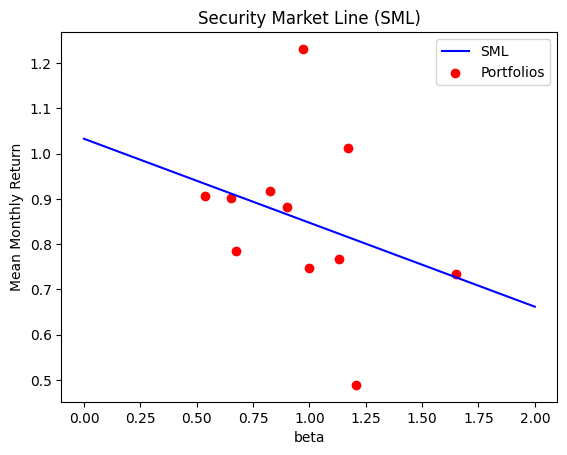

In [38]:
# 生成从0到2的100个 Beta 值，用于绘制连续的SML曲线。
beta_range = np.linspace(0, 2, 100)

# 根据 intercept 和 slope 计算每个 Beta 对应的收益值，以获得 SML 的一系列点。
sml_values = intercept + slope * beta_range  # SML

# plot SML
plt.plot(beta_range, sml_values, label='SML', color='blue')

# 绘制各行业组合的散点
plt.scatter(df['beta'], df['industry'], color='red', label='Portfolios')

# 添加图表的标签和标题
plt.xlabel('beta')
plt.ylabel('Mean Monthly Return')
plt.title('Security Market Line (SML)')
plt.legend()

plt.show()

### Explanation

The intercept of SML represents the market risk premium, while its slope shows the return from risk-free asstes. SML measures whether assets are reasonably priced if the asset portfolio is on the SML, that means the asset is reasonably priced. If assets above SML indicate that the asset is undervalued, otherwise, it is overvalued.